Original Notebook

https://www.kaggle.com/alincijov/continuous-bag-of-words-cbow-numpy-for-beginners

### Imports

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

### Data

In [2]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

### Clean Data

In [3]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences

'We are about to study the idea of a computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with our spells '

In [4]:
# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences

'We are about to study the idea of computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with our spells'

In [5]:
# lower all characters
sentences = sentences.lower()
sentences

'we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells'

### Vocabulary

In [6]:
words = sentences.split()
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [7]:
vocab = set(words)
vocab

{'about',
 'abstract',
 'are',
 'as',
 'beings',
 'by',
 'called',
 'computational',
 'computer',
 'computers',
 'conjure',
 'create',
 'data',
 'direct',
 'directed',
 'effect',
 'evolution',
 'evolve',
 'idea',
 'in',
 'inhabit',
 'is',
 'manipulate',
 'of',
 'other',
 'our',
 'pattern',
 'people',
 'process',
 'processes',
 'program',
 'programs',
 'rules',
 'spells',
 'spirits',
 'study',
 'that',
 'the',
 'they',
 'things',
 'to',
 'we',
 'with'}

In [8]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

### Dictionaries for vocab

In [9]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
word_to_ix

{'idea': 0,
 'to': 1,
 'other': 2,
 'computer': 3,
 'processes': 4,
 'as': 5,
 'pattern': 6,
 'data': 7,
 'directed': 8,
 'create': 9,
 'effect': 10,
 'abstract': 11,
 'with': 12,
 'by': 13,
 'conjure': 14,
 'things': 15,
 'in': 16,
 'our': 17,
 'program': 18,
 'computers': 19,
 'computational': 20,
 'programs': 21,
 'spells': 22,
 'they': 23,
 'that': 24,
 'is': 25,
 'evolution': 26,
 'are': 27,
 'about': 28,
 'manipulate': 29,
 'spirits': 30,
 'people': 31,
 'inhabit': 32,
 'of': 33,
 'called': 34,
 'rules': 35,
 'we': 36,
 'study': 37,
 'the': 38,
 'evolve': 39,
 'process': 40,
 'direct': 41,
 'beings': 42}

In [10]:
ix_to_word = {i: word for i, word in enumerate(vocab)}
ix_to_word

{0: 'idea',
 1: 'to',
 2: 'other',
 3: 'computer',
 4: 'processes',
 5: 'as',
 6: 'pattern',
 7: 'data',
 8: 'directed',
 9: 'create',
 10: 'effect',
 11: 'abstract',
 12: 'with',
 13: 'by',
 14: 'conjure',
 15: 'things',
 16: 'in',
 17: 'our',
 18: 'program',
 19: 'computers',
 20: 'computational',
 21: 'programs',
 22: 'spells',
 23: 'they',
 24: 'that',
 25: 'is',
 26: 'evolution',
 27: 'are',
 28: 'about',
 29: 'manipulate',
 30: 'spirits',
 31: 'people',
 32: 'inhabit',
 33: 'of',
 34: 'called',
 35: 'rules',
 36: 'we',
 37: 'study',
 38: 'the',
 39: 'evolve',
 40: 'process',
 41: 'direct',
 42: 'beings'}

### Data bags

In [11]:
# data - [(context), target]


#  """We are about to study the idea of a computational process.
# Computational processes are abstract beings that inhabit computers.
# As they evolve, processes manipulate other abstract things called data.
# The evolution of a process is directed by a pattern of rules
# called a program. People create programs to direct processes. In effect,
# we conjure the spirits of the computer with our spells."""


data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


### Embeddings

In [12]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings.shape)
embeddings

(43, 10)


array([[0.20204568, 0.84444315, 0.40804915, 0.19563981, 0.54863269,
        0.163597  , 0.45953453, 0.19319408, 0.8666644 , 0.91127955],
       [0.86221238, 0.73534473, 0.18292862, 0.44160618, 0.87421667,
        0.47202811, 0.32659229, 0.43124774, 0.57905784, 0.23646331],
       [0.00485974, 0.7009853 , 0.99790465, 0.47861004, 0.82574345,
        0.3242459 , 0.17062859, 0.1238307 , 0.75270619, 0.94723785],
       [0.07408003, 0.61137003, 0.62192148, 0.19253143, 0.79732784,
        0.93371513, 0.89094395, 0.14463085, 0.27672953, 0.42773055],
       [0.75802451, 0.1667426 , 0.60257809, 0.27241901, 0.05644489,
        0.74231462, 0.0123975 , 0.48469572, 0.07655885, 0.06491181],
       [0.82977077, 0.03306606, 0.32371959, 0.30134869, 0.96944508,
        0.36726726, 0.75433669, 0.79826344, 0.48094354, 0.68425222],
       [0.99916415, 0.86588892, 0.81412722, 0.87435564, 0.26451154,
        0.49649629, 0.47419268, 0.61176588, 0.39389616, 0.88795564],
       [0.43677578, 0.71526768, 0.3262020

### Linear Model

In [13]:
def linear(m, theta):
    w = theta
    return m.dot(w)

### Log softmax + NLLloss = Cross Entropy

In [14]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [15]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [16]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

### Forward function

In [17]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

### Backward function

In [18]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

### Optimize function

In [19]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

### Training function

In [20]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [21]:
# [(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]



epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

### Plot loss/epoch

Text(0, 0.5, 'Losses')

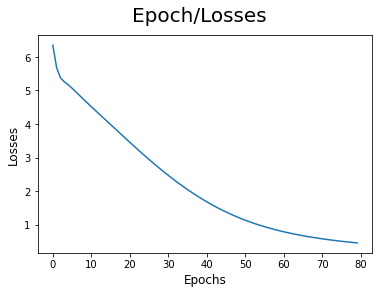

In [22]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

### Predict function

In [23]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [24]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

### Accuracy

In [25]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [29]:
accuracy()

1.0